In [1]:
import numpy as np
import matplotlib.pyplot as plt

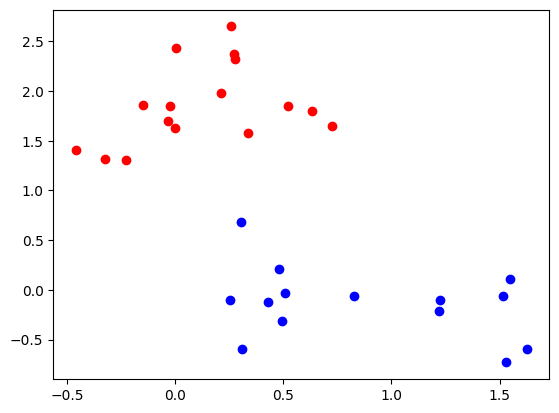

In [2]:
s = 1.5
class Point:
    def __init__(self):
        rnd = np.random.random()  
        x10 = 0 if rnd > 0.5 else 1
        x20 = 2 if rnd > 0.5 else 0
        self.x1 = x10 + s*(np.random.random()-0.5)
        self.x2 = x20 + s*(np.random.random()-0.5)
        self.color = 'r' if rnd > 0.5  else 'b'
        self.y = -1 if rnd > 0.5 else 1

    def get_cord(self):
        return self.x1, self.x2

    def get_vec(self):
        return np.array([self.x1, self.x2])

    def get_y(self):
        return w_test(self.x1, self.x2)
        
    def plot(self):
        plt.scatter(self.x1, self.x2, color = self.color)
        
X = [Point() for _ in range(30)]
X_test = [Point() for _ in range(100)]
for x in X:
    x.plot()

In [3]:
X_red = [x for x in X if x.y == -1]
X_blue = [x for x in X if x.y == 1]

$$\begin{cases}
\langle w, w \rangle \to \min; \\
y_i \cdot(\langle x , w\rangle - w_0 ) \geq 1
\end{cases}$$

$$\begin{cases}
L(w, w_0; \lambda) = \frac{1}{2} \langle w, w \rangle - \sum_{i=1}^{l}\lambda_i (y_i \cdot(\langle x , w\rangle - w_0 ) - 1) \to \min_{w, w_0} \max_{\lambda} \\
\lambda_i \geq 0, \quad i = 1, ..., l \\
\lambda_i = 0 \text{ либо }  y_i = \langle x , w\rangle - w_0, \quad i = 1, ..., l
\end{cases}$$

Необходимые условия

$$\frac{\partial L}{\partial w} = w- \sum_{i=1}^{l} \lambda_i y_i x_i = 0$$
$$\frac{\partial L}{\partial w_0} = - \sum_{i=1}^{l} \lambda_i y_i =0$$

т.е.

$$w =  \sum_{i=1}^{l} \lambda_i y_i x_i$$
$$ \sum_{i=1}^{l} \lambda_i y_i =0$$

Из равенства 

$$w =  \sum_{i=1}^{l} \lambda_i y_i x_i$$

следует, что при суммирование участвуют вектора $x_i$, где $\lambda_i \neq 0$, а таковыми являются вектора на границе $y_i = \langle x , w\rangle - w_0$ (их как раз и называют опорными векторами) 


подставляем результаты

$$\begin{cases}
- L(\lambda) = - \sum_{i=1}^{l}\lambda_i + \frac{1}{2} \sum_{i=1}^{l} \sum_{j=1}^{l} \lambda_j y_j \lambda_i y_i \langle x_i, x_j \rangle  \to \min_{\lambda} \\
\lambda_i \geq 0, \quad i = 1, ..., l \\
\sum_{i=1}^{l} \lambda_i y_i =0
\end{cases}$$

Особенность задачи в том, что число опорных векторов $h<< l$

Пример алгоритма решения задачи INCAS - последовательный метод активных ограничений 

Fine S., Scheinberg K. INCAS: An incremental active set method for SVM: Tech.
rep.: 2002. http://citeseer.ist.psu.edu/fine02incas.html., 

Scheinberg K. An efficient implementation of an active set method for svms // J.
Mach. Learn. Res.  2006.  Vol. 7.  Pp. 2237–2257

Перепишем задачу в матричном виде

$$\begin{cases}
 \frac{1}{2} \lambda^T Q \lambda - e^T \lambda \to \min_{\lambda} \\
\lambda \geq 0, \quad i = 1, ..., l \\
y^T \lambda = 0;
\end{cases}$$

$e$ - вектор из единиц, $Q_{ij} = y_j y_i \langle x_i, x_j \rangle$

Можно выделить опорные и не опорные элементы

$I_O = \{ i: \lambda_i = 0\}$

$I_S = \{ i: \lambda_i > 0\}$

$$\begin{cases}
 \frac{1}{2} \lambda^T_S Q_{SS} \lambda_S - e^T_S \lambda_S \to \min_{\lambda} \\
y^T_S \lambda_S = 0;
\end{cases}$$

Для первого приближения решается задача, если обнаруживаются противоричия, то объект переводится из одного множество в другое.

Если $i\in I_S, \lambda_i \leq 0$, то объект переводится из $I_S$ в $I_O$

Если $i\in I_O, y_i(\langle w, x_i\rangle - w_0) \leq 1$, то объект переводится из $I_O$ в $I_S$

$$w_0 = \frac{\min_{y_i = 1}(\langle w, x_i \rangle ) + \max_{y_i = -1}(\langle w, x_i \rangle)}{2}$$

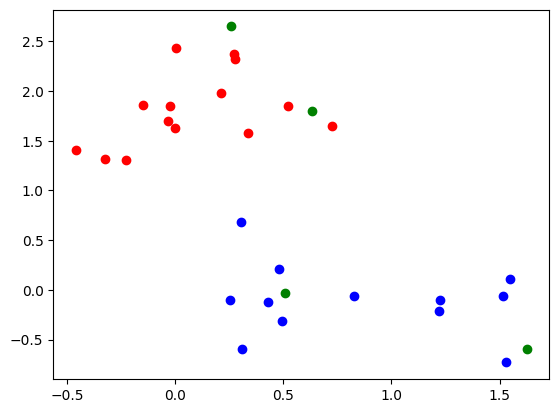

In [4]:
t = np.linspace(-1, 2, 100)

IS = []
IO = []
for x in X:
    x1, x2 = x.get_cord()
    if np.random.random() < 0.1:
        IS.append(x)
        plt.scatter(x1, x2, color='g')
    else:
        IO.append(x)
        x.plot()
    

In [5]:
def Q_ij(xi, xj):
    return (xi.x1*xj.x1+xi.x2*xj.x2)*xi.y*xj.y
Q = np.array([[Q_ij(xi, xj) for xi in IS] for xj in IS])
Y = np.array([xj.y for xj in IS] )

In [6]:
Q, Y

(array([[ 0.25762998, -0.0409568 ,  0.84330812, -0.25853187],
        [-0.0409568 ,  7.09305887,  1.15416667,  4.92402819],
        [ 0.84330812,  1.15416667,  2.99460828,  0.04138536],
        [-0.25853187,  4.92402819,  0.04138536,  3.62397868]]),
 array([ 1, -1,  1, -1]))

In [7]:
from scipy.optimize import minimize, LinearConstraint
linear_constraint = LinearConstraint ([Y], [0], [0])

from scipy.optimize import Bounds
bounds = Bounds ([0 for _ in IS], [np.inf for _ in IS])

In [8]:
def Qfun(lambda_):
    return 0.5 * lambda_@Q@lambda_ - lambda_@np.ones_like(lambda_)
lambda_0 = np.array([1 for _ in IS])
lambda_rez = minimize(Qfun, lambda_0, constraints=linear_constraint, bounds=bounds).x

In [9]:
def get_w_from_IS(IS, lambda_rez):
    w = np.zeros(2)
    for lm, x in zip(lambda_rez, IS):
        w += lm*x.y*x.get_vec()
    return w
        

In [10]:
w_new = get_w_from_IS(IS, lambda_rez)

In [11]:
w0_new = [w_new@x.get_vec() -x.y for x in IO]
w0_new = np.mean(w0_new)

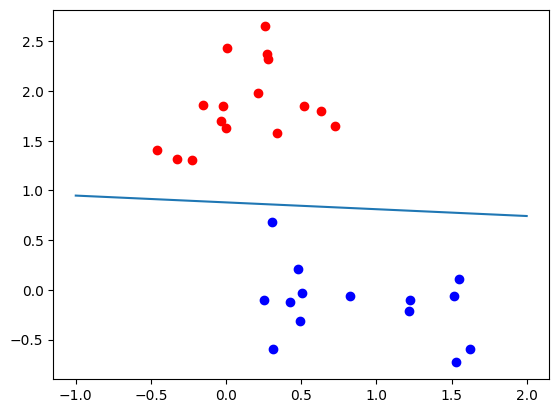

In [12]:
# Поиск опорных векторов
# t = np.linspace(0, 1, 100)
old_ = w0_new/w_new[1]-t*w_new[0]/w_new[1]
plt.plot(t, old_)

for lm, x in zip(lambda_rez, IS):
    # x1, x2 = x.get_cord()
    # plt.scatter(x1, x2, color='k' if lm <= 0 else 'g')
    x.plot()

for x in IO:
    x.plot()

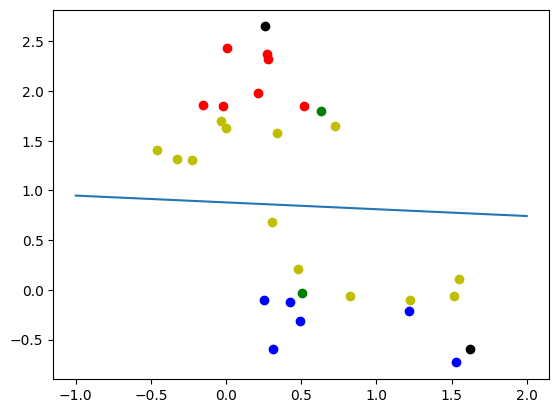

In [13]:
new_IO = []
new_IS = []

# Поиск опорных векторов

old_ =  w0_new/w_new[1]-t*w_new[0]/w_new[1]
plt.plot(t, old_)

for lm, x in zip(lambda_rez, IS):
    x1, x2 = x.get_cord()
    if lm <= 0:
        new_IO.append(x)
        plt.scatter(x1, x2, color='k')
    else:
        new_IS.append(x)
        plt.scatter(x1, x2, color='g')

for x in IO:
    x1, x2 = x.get_cord()
    if (w_new@x.get_vec() - w0_new)* x.y <= 1:
        new_IS.append(x)
        plt.scatter(x1, x2, color='y')
    else:
        new_IO.append(x)
        x.plot()

In [14]:
def iter_SVM(IS, IO):
    Q = np.array([[Q_ij(xi, xj) for xi in IS] for xj in IS])
    Y = np.array([xj.y for xj in IS] )
    linear_constraint = LinearConstraint ([Y], [0], [0])
    bounds = Bounds ([0 for _ in IS], [np.inf for _ in IS])

    def Qfun(lambda_):
        return 0.5 * lambda_@Q@lambda_ - lambda_@np.ones_like(lambda_)
    
    lambda_0 = np.array([1 for _ in IS])
    lambda_rez = minimize(Qfun, lambda_0, constraints=linear_constraint, bounds=bounds).x
    
    w_new = get_w_from_IS(IS, lambda_rez)
    w_fun = lambda x: w_new@x.get_vec() #- x.y
    min_ = np.min([w_fun(x) for x in IO if x.y == 1]) 
    max_ = np.max([w_fun(x) for x in IO if x.y == -1])
    w0_new = 0.5*(min_+max_)
    return w_new, w0_new, lambda_rez

def new_ISIO(IS, IO, w, w0, lambda_rez):
    new_IO = []
    new_IS = []
    
    for lm, x in zip(lambda_rez, IS):
        x1, x2 = x.get_cord()
        if lm <= 0:
            new_IO.append(x)
        else:
            new_IS.append(x)

    for x in IO:
        x1, x2 = x.get_cord()
        if (w@x.get_vec() - w0)* x.y<=1:
            new_IS.append(x)
        else:
            new_IO.append(x)
    return new_IS, new_IO

In [15]:
w_new, w0_new, lambda_rez = iter_SVM(new_IS, new_IO)

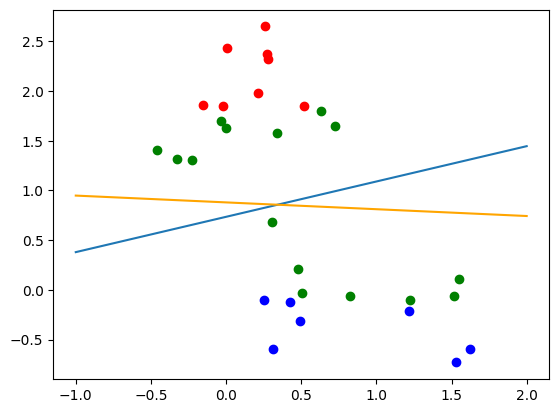

In [16]:
# Поиск опорных векторов

new_ = w0_new/w_new[1]-t*w_new[0]/w_new[1]
plt.plot(t, new_)
plt.plot(t, old_, 'orange')

for x in new_IS:
    x1, x2 = x.get_cord()
    plt.scatter(x1, x2, color='g')

for x in new_IO:
    x.plot()


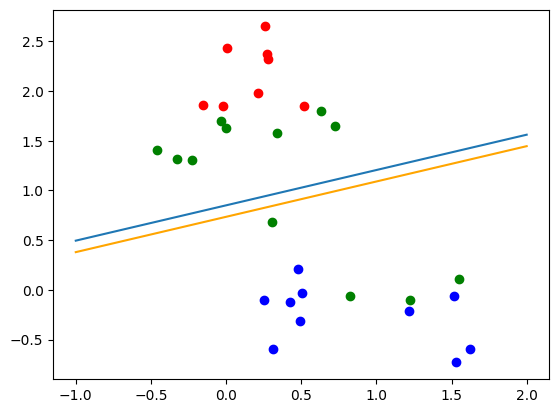

In [17]:
old_ = new_
new_IS, new_IO = new_ISIO(new_IS, new_IO, w_new, w0_new, lambda_rez)
w_new, w0_new, lambda_rez = iter_SVM(new_IS, new_IO)

new_ = w0_new/w_new[1]-t*w_new[0]/w_new[1]
plt.plot(t, new_)
plt.plot(t, old_, 'orange')

for x in new_IS:
    x1, x2 = x.get_cord()
    plt.scatter(x1, x2, color='g')

for x in new_IO:
    x.plot()


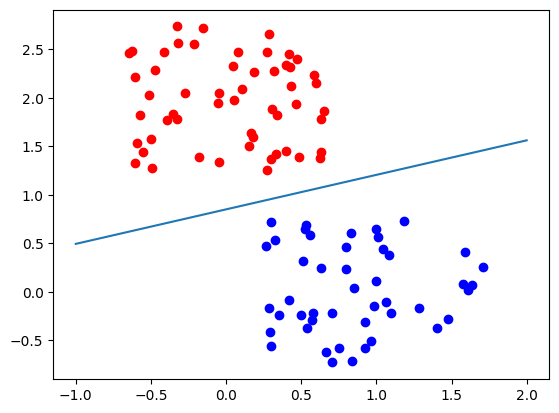

In [18]:
plt.plot(t, new_)

for x in X_test:
    x.plot()

In [19]:
w_new, w0_new, lambda_rez = iter_SVM(X_test, X_test)
new_ = w0_new/w_new[1]-t*w_new[0]/w_new[1]

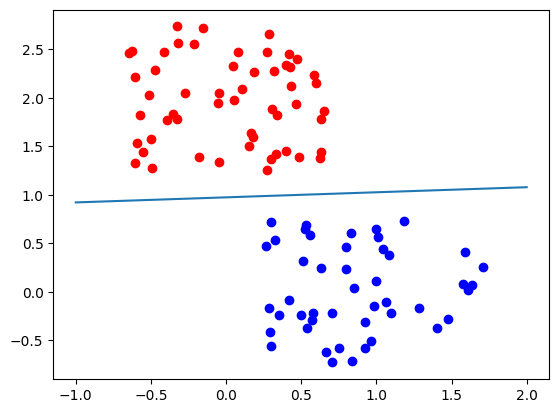

In [20]:
plt.plot(t, new_)

for x in X_test:
    x.plot()